In [1]:
#python libraries : 

In [2]:
from collections import Counter
import nltk
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable
from matplotlib import rcParams
import matplotlib.cm as cm
import string
import re
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import preprocessing
import pandas
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import streamlit as st
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import VotingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
 # Dataset : 

In [4]:
data = pd.read_csv('phrase.csv') 

In [5]:
data.head() 

,phrase,class
0,الدليل على ارهاب حزب الله ان الناشط والحاقد لق...,1
1,كنتم قرفنا بأناشيدكم اللي كلها ارهاب وقتل كلها...,0
2,كل العالم يعلم أن بشار يقصف بالكيماوي ويقتل ال...,0
3,ارهاب اردوغان لشعبه وجيشه بحجة مسرحية الانقلاب...,1
4,حتى الذي ينقذ الجرحى يتم استهدافه في الغوطة ال...,0


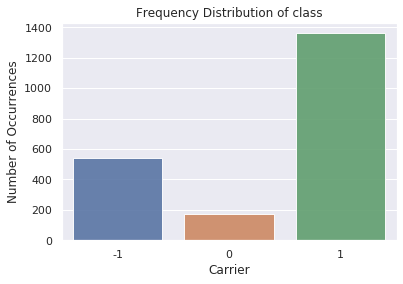

In [6]:
carrier_count = data["class"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of class')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

[nltk_data] Downloading package punkt to /home/alatrech/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'الدليل على ارهاب حزب الله ان الناشط والحاقد لقمان سليم يدعو الى شن حرب على الطائفة الشيعية لاصابتها بنكبة'

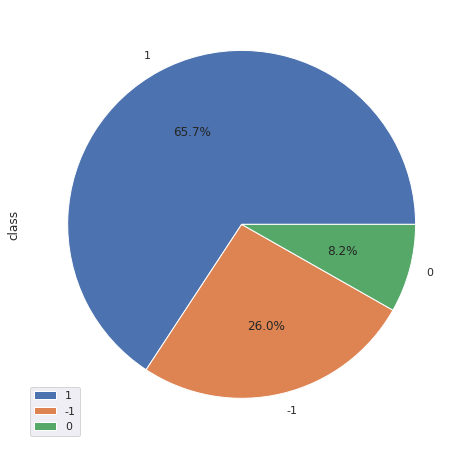

In [7]:
data["class"].value_counts().head(3).plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

data["class"].value_counts()

nltk.download('punkt')

nltk.word_tokenize(data["phrase"][0])

data["phrase"][0]

In [11]:
# Tokenize using the white spaces
nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])

['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [12]:
# Tokenize using Punctuations
nltk.tokenize.WordPunctTokenizer().tokenize(data["phrase"][0])

['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [13]:
# Tokenization using grammer rules
nltk.tokenize.TreebankWordTokenizer().tokenize(data["phrase"][0])

['الدليل',
 'على',
 'ارهاب',
 'حزب',
 'الله',
 'ان',
 'الناشط',
 'والحاقد',
 'لقمان',
 'سليم',
 'يدعو',
 'الى',
 'شن',
 'حرب',
 'على',
 'الطائفة',
 'الشيعية',
 'لاصابتها',
 'بنكبة']

In [14]:
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [15]:
# porter's stemmer
porterStemmedWords = [nltk.stem.PorterStemmer().stem(word) for word in words]
df['PorterStemmedWords'] = pd.Series(porterStemmedWords)

In [16]:
# LEMMATIZATION
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)

In [17]:
# LEMMATIZATION
words = nltk.tokenize.WhitespaceTokenizer().tokenize(data["phrase"][0])
df = pd.DataFrame()
df['OriginalWords'] = pd.Series(words)
# WordNet Lemmatization
wordNetLemmatizedWords = [
    nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words]
df['WordNetLemmatizer'] = pd.Series(wordNetLemmatizedWords)
df

,OriginalWords,WordNetLemmatizer
0,الدليل,الدليل
1,على,على
2,ارهاب,ارهاب
3,حزب,حزب
4,الله,الله
5,ان,ان
6,الناشط,الناشط
7,والحاقد,والحاقد
8,لقمان,لقمان
9,سليم,سليم


In [18]:
# Dataset analysis : 

In [19]:
data['phrase'].head() 

0    الدليل على ارهاب حزب الله ان الناشط والحاقد لق...
1    كنتم قرفنا بأناشيدكم اللي كلها ارهاب وقتل كلها...
2    كل العالم يعلم أن بشار يقصف بالكيماوي ويقتل ال...
3    ارهاب اردوغان لشعبه وجيشه بحجة مسرحية الانقلاب...
4    حتى الذي ينقذ الجرحى يتم استهدافه في الغوطة ال...
Name: phrase, dtype: object

In [20]:
# Checking null values 

In [21]:
data[data.isnull().any(axis=1)].head()

,phrase,class


In [22]:
#Checking null values count

In [23]:
np.sum(data.isnull().any(axis=1))

0

In [24]:
data.isnull().any(axis=0)

phrase    False
class     False
dtype: bool

In [25]:
#cleaning tweet text : 

In [26]:
for letter in '#.][!XR':
    data['phrase'] = data['phrase'].astype(str).str.replace(letter, '')

In [27]:
data.head()

,phrase,class
0,الدليل على ارهاب حزب الله ان الناشط والحاقد لق...,1
1,كنتم قرفنا بأناشيدكم اللي كلها ارهاب وقتل كلها...,0
2,كل العالم يعلم أن بشار يقصف بالكيماوي ويقتل ال...,0
3,ارهاب اردوغان لشعبه وجيشه بحجة مسرحية الانقلاب...,1
4,حتى الذي ينقذ الجرحى يتم استهدافه في الغوطة ال...,0


In [28]:
# Preprocess data : 

In [29]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

In [31]:
# Remove_punctuations :

In [32]:
def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [33]:
# Normalize_arabic : 

In [34]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [35]:
# Remove_repeating_char: 

In [36]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [37]:
#processPost for applying all functions 

In [38]:
def processPost(tweet):

    # Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)

    # Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)

    # Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet = remove_punctuations(tweet)

    # normalize the tweet
    #tweet= normalize_arabic(tweet)

    # remove repeated letters
    tweet = remove_repeating_char(tweet)

    return tweet

In [39]:
# Applying processPost function for preprocessing 

In [40]:
data["phrase"] = data["phrase"].apply(lambda x: processPost(x))

In [41]:
# Getting Tokenize the tweet text 

In [42]:
tokenizer = RegexpTokenizer(r'\w+')
data["phrase"] = data["phrase"].apply(tokenizer.tokenize)

In [43]:
data["phrase"].head()

0    [الدليل, على, ارهاب, حزب, اله, ان, الناشط, وال...
1    [كنتم, قرفنا, بأناشيدكم, الي, كلها, ارهاب, وقت...
2    [كل, العالم, يعلم, أن, بشار, يقصف, بالكيماوي, ...
3    [ارهاب, اردوغان, لشعبه, وجيشه, بحجة, مسرحية, ا...
4    [حتى, الذي, ينقذ, الجرحى, يتم, استهدافه, في, ا...
Name: phrase, dtype: object

In [44]:
# Stop words :

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alatrech/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stopwords_list = stopwords.words('arabic')

In [47]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [48]:
print(len(stopwords_list))

248


In [49]:
print(type(stopwords_list))

<class 'list'>


In [50]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

In [51]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [55]:
# Removing stop words 
data['phrase'] = data['phrase'].apply(
    lambda x: [item for item in x if item not in stopwords_list])

In [56]:
# Tweet text information 
all_words = [word for tokens in data['phrase'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in data['phrase']]

In [57]:
VOCAB = sorted(list(set(all_words)))

In [58]:
print("%s words total, with a vocabulary size of %s" %
      (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

17629 words total, with a vocabulary size of 8381
Max sentence length is 45


In [62]:
# Counter all_words :

In [63]:
counter = Counter(all_words)

In [64]:
counter.most_common(25)

[('اله', 254),
 ('و', 175),
 ('بشار', 110),
 ('انت', 109),
 ('ابن', 85),
 ('الصهيوني', 85),
 ('يانجس', 80),
 ('ان', 79),
 ('القطري', 70),
 ('الي', 67),
 ('الإرهابي', 66),
 ('ياعديم', 63),
 ('ياكلب', 60),
 ('ياحقير', 59),
 ('ياقذر', 52),
 ('ك', 51),
 ('منك', 47),
 ('يلعنك', 47),
 ('المليشيات', 44),
 ('يامتطرف', 44),
 ('الشرف', 40),
 ('انا', 39),
 ('يوما', 37),
 ('انتم', 36),
 ('واله', 36)]

In [65]:
counted_words = Counter(all_words)

In [66]:
#top 25 words in positive 

In [67]:
words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

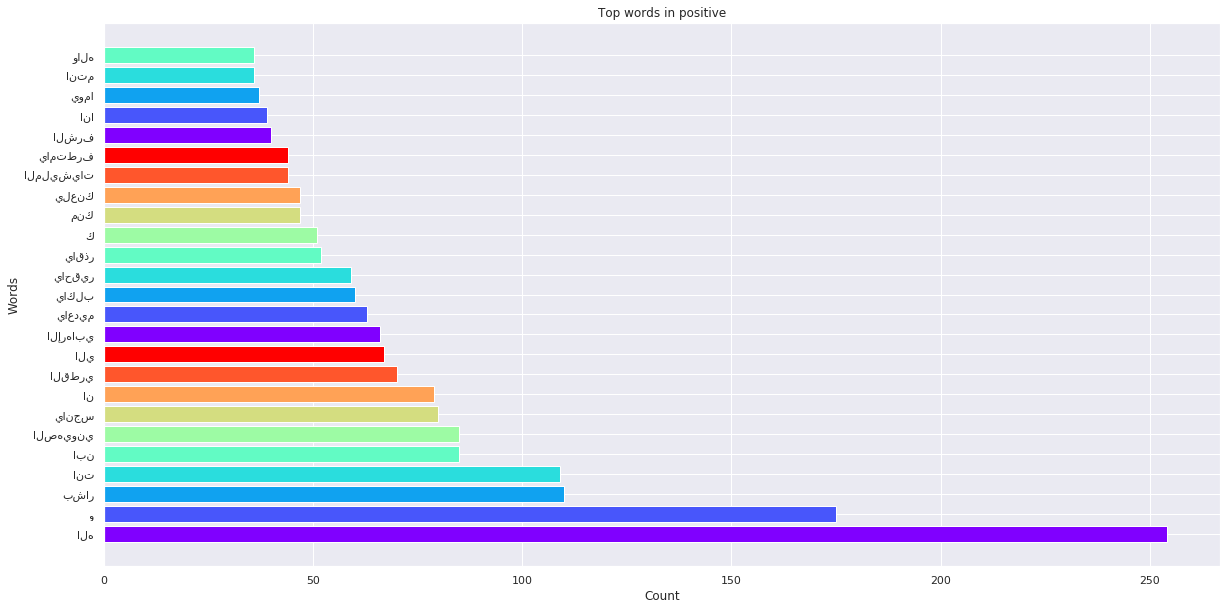

In [68]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [69]:
# Features Extraction from tweets text with TFIDF unigram

In [70]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features=10000)

In [71]:
unigramdataGet = word_vectorizer.fit_transform(data['phrase'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features = pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features > 0] = 1

unigramdata_features.head()

2021-06-18 10:53:47.877 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


,10,12,14,16,17,180درجة,1898,20,201,2018,...,٢٠,٢٠١م,٤٥,چه,کافر,کل,گالزجاجة,یا,یاکافر,یطفي
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# Encoding class as 1 for Postive class and 0 for negative class : 

In [73]:
pro = preprocessing.LabelEncoder()
data['class'].replace({-1: 2}, inplace=True)
encpro = pro.fit_transform(data['class'])
data['class'] = encpro

In [75]:
# By getting features and Class :

In [76]:
y = data['class']
X = unigramdata_features
y

0       1
1       0
2       0
3       1
4       0
       ..
2065    0
2066    0
2067    0
2068    0
2069    0
Name: class, Length: 2070, dtype: int64

In [77]:
# Spliting Dataset into 70% Training and 30% Testing : 

In [78]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=2)

In [79]:
                  #--------Trainig and Testing with Machine Learning Algorithms ----------------


In [80]:
# 1/ Naive Bayes Algorithm : 

In [81]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb


GaussianNB()

In [82]:
# Accuracy : 
 

In [83]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.758


In [84]:
# Precision : 

In [86]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))


Precision Score :  [0.75       0.80740741 0.65      ]


In [87]:
# Recall
 

In [88]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))


recall_score :  [0.5        0.82889734 0.67826087]


In [89]:
#F1 : 

In [90]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.6        0.81801126 0.66382979]


In [92]:
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None)) 

Accuracy= 0.758
Precision Score :  [0.75       0.80740741 0.65      ]
recall_score :  [0.5        0.82889734 0.67826087]
F1 :  [0.6        0.81801126 0.66382979]


In [93]:
# 2/ RidgeClassifier Algorithm


In [94]:
RC = RidgeClassifier()
RC = RC.fit(X_train, y_train)
RC

RidgeClassifier()

In [95]:
# Accuarcy :

In [96]:
y_pred = RC.predict(X_test)
rc_1 = RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test))) 

Accuracy= 0.930


In [99]:
# Precision : 

In [100]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))


Precision Score :  [0.93548387 0.92086331 0.95238095]


In [101]:
# Recall : 

In [102]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.80555556 0.97338403 0.86956522]


In [103]:
#F1 :

In [104]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.86567164 0.94639556 0.90909091]


In [105]:
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Accuracy= 0.930
Precision Score :  [0.93548387 0.92086331 0.95238095]
recall_score :  [0.80555556 0.97338403 0.86956522]
F1 :  [0.86567164 0.94639556 0.90909091]


In [106]:
# 3/ PassiveAggressiveClassifier Algorithm 
 

In [107]:
PC = PassiveAggressiveClassifier()
PC = PC.fit(X_train, y_train)
PC

PassiveAggressiveClassifier()

In [108]:
# Accuarcy 

In [109]:
y_pred = PC.predict(X_test)
pc_1 = PC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(PC.score(X_test, y_test)))

Accuracy= 0.918


In [110]:
# Precision Score 

In [111]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [0.88571429 0.91636364 0.93269231]


In [112]:
# Recall : 

In [113]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.86111111 0.9581749  0.84347826]


In [114]:
#F1

In [115]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.87323944 0.93680297 0.88584475]


In [129]:
#  4/LogisticRegression Algorithm :

In [117]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

LogisticRegression(C=1)

In [118]:
# Accuracy :

In [119]:
LR = LogisticRegression(penalty='l2', C=1)
LR = LR.fit(X_train, y_train)
LR

y_pred = LR.predict(X_test)
lr_1 = LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))


Accuracy= 0.923


In [122]:
# Precision score : 

In [123]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))

Precision Score :  [1.         0.90526316 0.95192308]


In [124]:
# Recall 

In [125]:
print("recall_score : ", recall_score(y_test, y_pred, average=None))

recall_score :  [0.69444444 0.98098859 0.86086957]


In [126]:
#F1 :

In [127]:
print("F1 : ", f1_score(y_test, y_pred, average=None))

F1 :  [0.81967213 0.94160584 0.90410959]


In [128]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))


Precision Score :  [1.         0.90526316 0.95192308]
recall_score :  [0.69444444 0.98098859 0.86086957]
F1 :  [0.81967213 0.94160584 0.90410959]


In [130]:
 # 5/classification report :

In [131]:
CR = classification_report(y_test, y_pred)
print(CR)
print('\n')
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.91      0.98      0.94       263
           2       0.95      0.86      0.90       115

    accuracy                           0.92       414
   macro avg       0.95      0.85      0.89       414
weighted avg       0.93      0.92      0.92       414



<function confusion_matrix at 0x7fd547032290>


In [132]:
# 6/ LinearSVC :

In [133]:
svc = LinearSVC(C=1, max_iter=500)
svc = svc.fit(X_train, y_train)
svc

LinearSVC(C=1, max_iter=500)

In [134]:
y_pred = svc.predict(X_test)
svc_1 = svc.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(svc.score(X_test, y_test)))

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))
confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy= 0.932
Precision Score :  [0.9375     0.92418773 0.95238095]
recall_score :  [0.83333333 0.97338403 0.86956522]
F1 :  [0.88235294 0.94814815 0.90909091]
<function confusion_matrix at 0x7fd547032290>


In [135]:
# 7/ RandomForestClassifier : 

In [136]:
raf = RandomForestClassifier(
    min_samples_leaf=20, min_samples_split=20, random_state=10)
raf = raf.fit(X_train, y_train)
raf

RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,
                       random_state=10)

In [137]:
y_pred = raf.predict(X_test)
raf_1 = raf.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(raf.score(X_test, y_test)))

Accuracy= 0.635


In [138]:

print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.        0.6352657 0.       ]
recall_score :  [0. 1. 0.]
F1 :  [0.         0.77695716 0.        ]


In [141]:
# 8/VotingClassifier : 

In [140]:
Ens = VotingClassifier(estimators=[(
    'SVM', svc), ('nb', nb), ('RC', RC), ('raf', raf), ('PC', PC), ('LR', LR)], voting='hard')
Ens = Ens.fit(X_train, y_train)
Ens

VotingClassifier(estimators=[('SVM', LinearSVC(C=1, max_iter=500)),
                             ('nb', GaussianNB()), ('RC', RidgeClassifier()),
                             ('raf',
                              RandomForestClassifier(min_samples_leaf=20,
                                                     min_samples_split=20,
                                                     random_state=10)),
                             ('PC', PassiveAggressiveClassifier()),
                             ('LR', LogisticRegression(C=1))])

In [142]:
y_pred = Ens.predict(X_test)
Ens_1 = Ens.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(Ens.score(X_test, y_test)))

Accuracy= 0.928


In [143]:
print("Precision Score : ", precision_score(y_test, y_pred, average=None))
print("recall_score : ", recall_score(y_test, y_pred, average=None))
print("F1 : ", f1_score(y_test, y_pred, average=None))

Precision Score :  [0.9375     0.91459075 0.96039604]
recall_score :  [0.83333333 0.97718631 0.84347826]
F1 :  [0.88235294 0.94485294 0.89814815]


In [144]:
                         #Comparison of all algorithms Results

In [147]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Naive Bayes Algorithm", round(nb_1, 2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1, 2)])
x.add_row(["Passive Aggressive Classifier Algorithm", round(pc_1, 2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1, 2)])
x.add_row(["SVM", round(svc_1, 2)])
x.add_row(["Random Forest", round(raf_1, 2)])
x.add_row(["VotingClassifier", round(Ens_1, 2)])
print(x)
print('\n')



Comparison of all algorithms on F1 score
+-----------------------------------------+----------+
|                  Model                  | Accuracy |
+-----------------------------------------+----------+
|          Naive Bayes Algorithm          |   0.76   |
|        Ridge Classifier Algorithm       |   0.93   |
| Passive Aggressive Classifier Algorithm |   0.92   |
|      Logistic Regression Algorithm      |   0.92   |
|                   SVM                   |   0.93   |
|              Random Forest              |   0.64   |
|             VotingClassifier            |   0.93   |
+-----------------------------------------+----------+




In [150]:
# Training Logistic Regression algorithm  : 
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1)

In [151]:
#Prediction on sample text

In [152]:
testing = [
    'ضربُ النِّساء فعلٌ قبيح، وهو ساقطٌ من أعداد الرجال بل هو أقرب للحيوان منهُ']

In [153]:
x = word_vectorizer.transform(testing)

In [154]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

   Prediction
0           1


In [156]:
result=pd.DataFrame()
result['Text']=testing
result['Prediction']=prediction
result

,Text,Prediction
0,ضربُ النِّساء فعلٌ قبيح، وهو ساقطٌ من أعداد ال...,1
